# Data Scientist Nanodegree
## Unsupervised Learning
# Project: Identify Customer Segments
### Laila Hussain Alqawain

In this project, I will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# magic word for producing visualizations in notebook
%matplotlib inline

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [2]:
# Load in the general demographics data.
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv', sep=';')

# Load in the feature summary file.
feat_info = pd.read_table('AZDIAS_Feature_Summary.csv', sep=';')

In [3]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).
azdias.shape

(891221, 85)

In [4]:
# Print the five numbers summary for azdias
azdias.describe()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
count,891221.000000,891221.000000,891221.000000,886367.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,...,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,794005.000000,794005.000000,794005.00000
mean,-0.358435,2.777398,1.522098,3.632838,3.074528,2.821039,3.401106,3.033328,2.874167,3.075121,...,2.253330,2.801858,1.595426,0.699166,1.943913,3.612821,3.381087,3.167854,5.293002,3.07222
std,1.198724,1.068775,0.499512,1.595021,1.321055,1.464749,1.322134,1.529603,1.486731,1.353248,...,0.972008,0.920309,0.986736,0.727137,1.459654,0.973967,1.111598,1.002376,2.303739,1.36298
min,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000
25%,-1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,1.000000,2.000000,1.000000,0.000000,1.000000,3.000000,3.000000,3.000000,4.000000,2.00000
50%,-1.000000,3.000000,2.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,2.000000,3.000000,2.000000,1.000000,1.000000,4.000000,3.000000,3.000000,5.000000,3.00000
75%,-1.000000,4.000000,2.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,2.000000,1.000000,3.000000,4.000000,4.000000,4.000000,7.000000,4.00000
max,3.000000,9.000000,2.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,4.000000,3.000000,2.000000,5.000000,5.000000,5.000000,9.000000,9.000000,9.00000


In [5]:
# Print the first five rows of azdias
azdias.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [6]:
# Print the number of rows and columns for feat_info
feat_info.shape

(85, 4)

In [7]:
# Print the five numbers summary for feat_info
feat_info.describe()

,attribute,information_level,type,missing_or_unknown
count,85,85,85,85
unique,85,9,5,9
top,KK_KUNDENTYP,person,ordinal,[-1]
freq,1,43,49,26


In [8]:
# Print the first five rows of feat_info
feat_info.head()

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]


## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

In [9]:
# Print number of missing data values in azdias
azdias.isnull().sum ().sum()

4896838

In [10]:
# Print number of missing data values in feat_info
feat_info.isnull().sum ().sum()

0

In [11]:
%%time 
# cleansing feat_info
feat_info['missing_or_unknown'] = feat_info.missing_or_unknown.str.strip('[]').str.split(',')

# Identify missing or unknown data values and convert them to NaNs
for attrib, missing_values in zip(feat_info['attribute'],feat_info['missing_or_unknown']):
    if missing_values[0] != '':
        for value in missing_values:
            
            if value.isnumeric() or value.lstrip('-').isnumeric(): # to prevent converting XX or X
                value = int(value) 
            # convert
            azdias.loc[azdias[attrib]==value,attrib]=np.nan

#Save the result into a new df as this step takes a long time to run    
azdias.to_csv('azdias_parsed.csv', sep=';', index = False)

CPU times: user 1min 12s, sys: 20.4 s, total: 1min 32s
Wall time: 1min 33s


#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

In [12]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.
missing_values_per_column = azdias.isnull().sum ()

Text(0.5,1,'Missing Values in Columns')

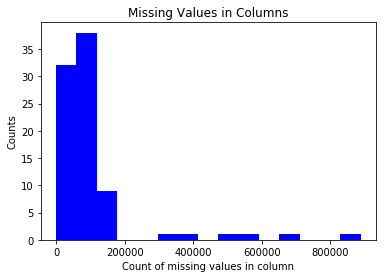

In [13]:
# Investigate patterns in the amount of missing data in each column.
plt.hist(missing_values_per_column, bins=15, facecolor='b', alpha=1)
plt.xlabel('Count of missing values in column')
plt.ylabel('Counts')
plt.title('Missing Values in Columns')

Text(0.5,1,'Names of Columns with Missing Values')

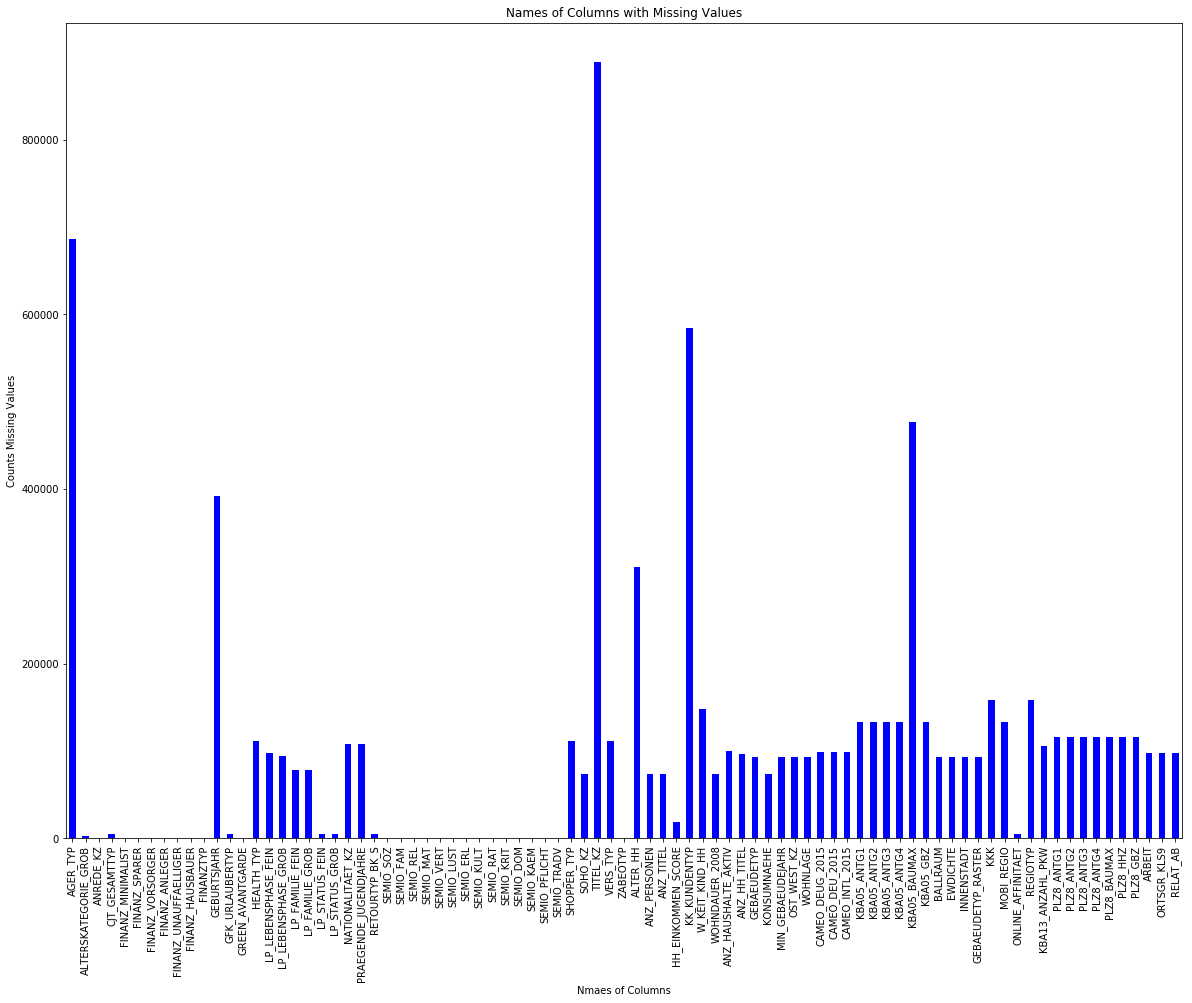

In [14]:
# Histogram shows the columns names with missing values
missing_values_per_column.plot.bar(figsize=(20,15), facecolor='b')
plt.xlabel('Nmaes of Columns')
plt.ylabel('Counts Missing Values')
plt.title('Names of Columns with Missing Values')

In [15]:
# Print columns names with number of missing values.
missing_values_per_column

AGER_TYP                 685843
ALTERSKATEGORIE_GROB       2881
ANREDE_KZ                     0
CJT_GESAMTTYP              4854
FINANZ_MINIMALIST             0
FINANZ_SPARER                 0
FINANZ_VORSORGER              0
FINANZ_ANLEGER                0
FINANZ_UNAUFFAELLIGER         0
FINANZ_HAUSBAUER              0
FINANZTYP                     0
GEBURTSJAHR              392318
GFK_URLAUBERTYP            4854
GREEN_AVANTGARDE              0
HEALTH_TYP               111196
LP_LEBENSPHASE_FEIN       97632
LP_LEBENSPHASE_GROB       94572
LP_FAMILIE_FEIN           77792
LP_FAMILIE_GROB           77792
LP_STATUS_FEIN             4854
LP_STATUS_GROB             4854
NATIONALITAET_KZ         108315
PRAEGENDE_JUGENDJAHRE    108164
RETOURTYP_BK_S             4854
SEMIO_SOZ                     0
SEMIO_FAM                     0
SEMIO_REL                     0
SEMIO_MAT                     0
SEMIO_VERT                    0
SEMIO_LUST                    0
                          ...  
OST_WEST

In [16]:
# Identify the coulmns with missing values > 200000
clean_missing_values_per_column = missing_values_per_column[missing_values_per_column>200000]

# Print the columns names with missing values > 200000
clean_missing_values_per_column

AGER_TYP        685843
GEBURTSJAHR     392318
TITEL_KZ        889061
ALTER_HH        310267
KK_KUNDENTYP    584612
KBA05_BAUMAX    476524
dtype: int64

In [17]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)
azdias.drop(clean_missing_values_per_column.index, axis=1, inplace=True)

In [18]:
# Check number of columns in azdias after romving columns with missing values
azdias.shape

(891221, 79)

#### Discussion 1.1.2: Assess Missing Data in Each Column

As we see from the Missing Values in Columns plot, there are 6 outliers  with missing values over 200000. From the Names of Columns with Missing Values plot, we can see the names of columns and identify the columns with highest missing values. I removed these columns: AGER_TYP, GEBURTSJAHR, TITEL_KZ, ALTER_HH, KK_KUNDENTYP and KBA05_BAUMAX. So, we have 79 columns.

#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on.

In [19]:
# How much data is missing in each row of the dataset?
missing_values_per_row = azdias.isnull().sum(axis=1)

# Print five numbers summary of missing_values_per_row
missing_values_per_row.describe()

count    891221.000000
mean          5.649894
std          13.234687
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          49.000000
dtype: float64

Text(0.5,0,'Missing Values')

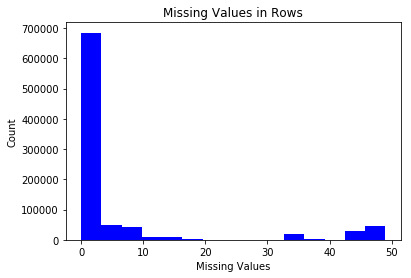

In [20]:
# Histogram shows the number of rows with missing values
plt.hist(missing_values_per_row, bins=15, facecolor='b', alpha=1 )
plt.title('Missing Values in Rows')
plt.ylabel('Count')
plt.xlabel('Missing Values')

In [21]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.
missing_few_values = azdias[azdias.isnull().sum(axis=1) <= 20]
missing_many_values = azdias[azdias.isnull().sum(axis=1) > 20]

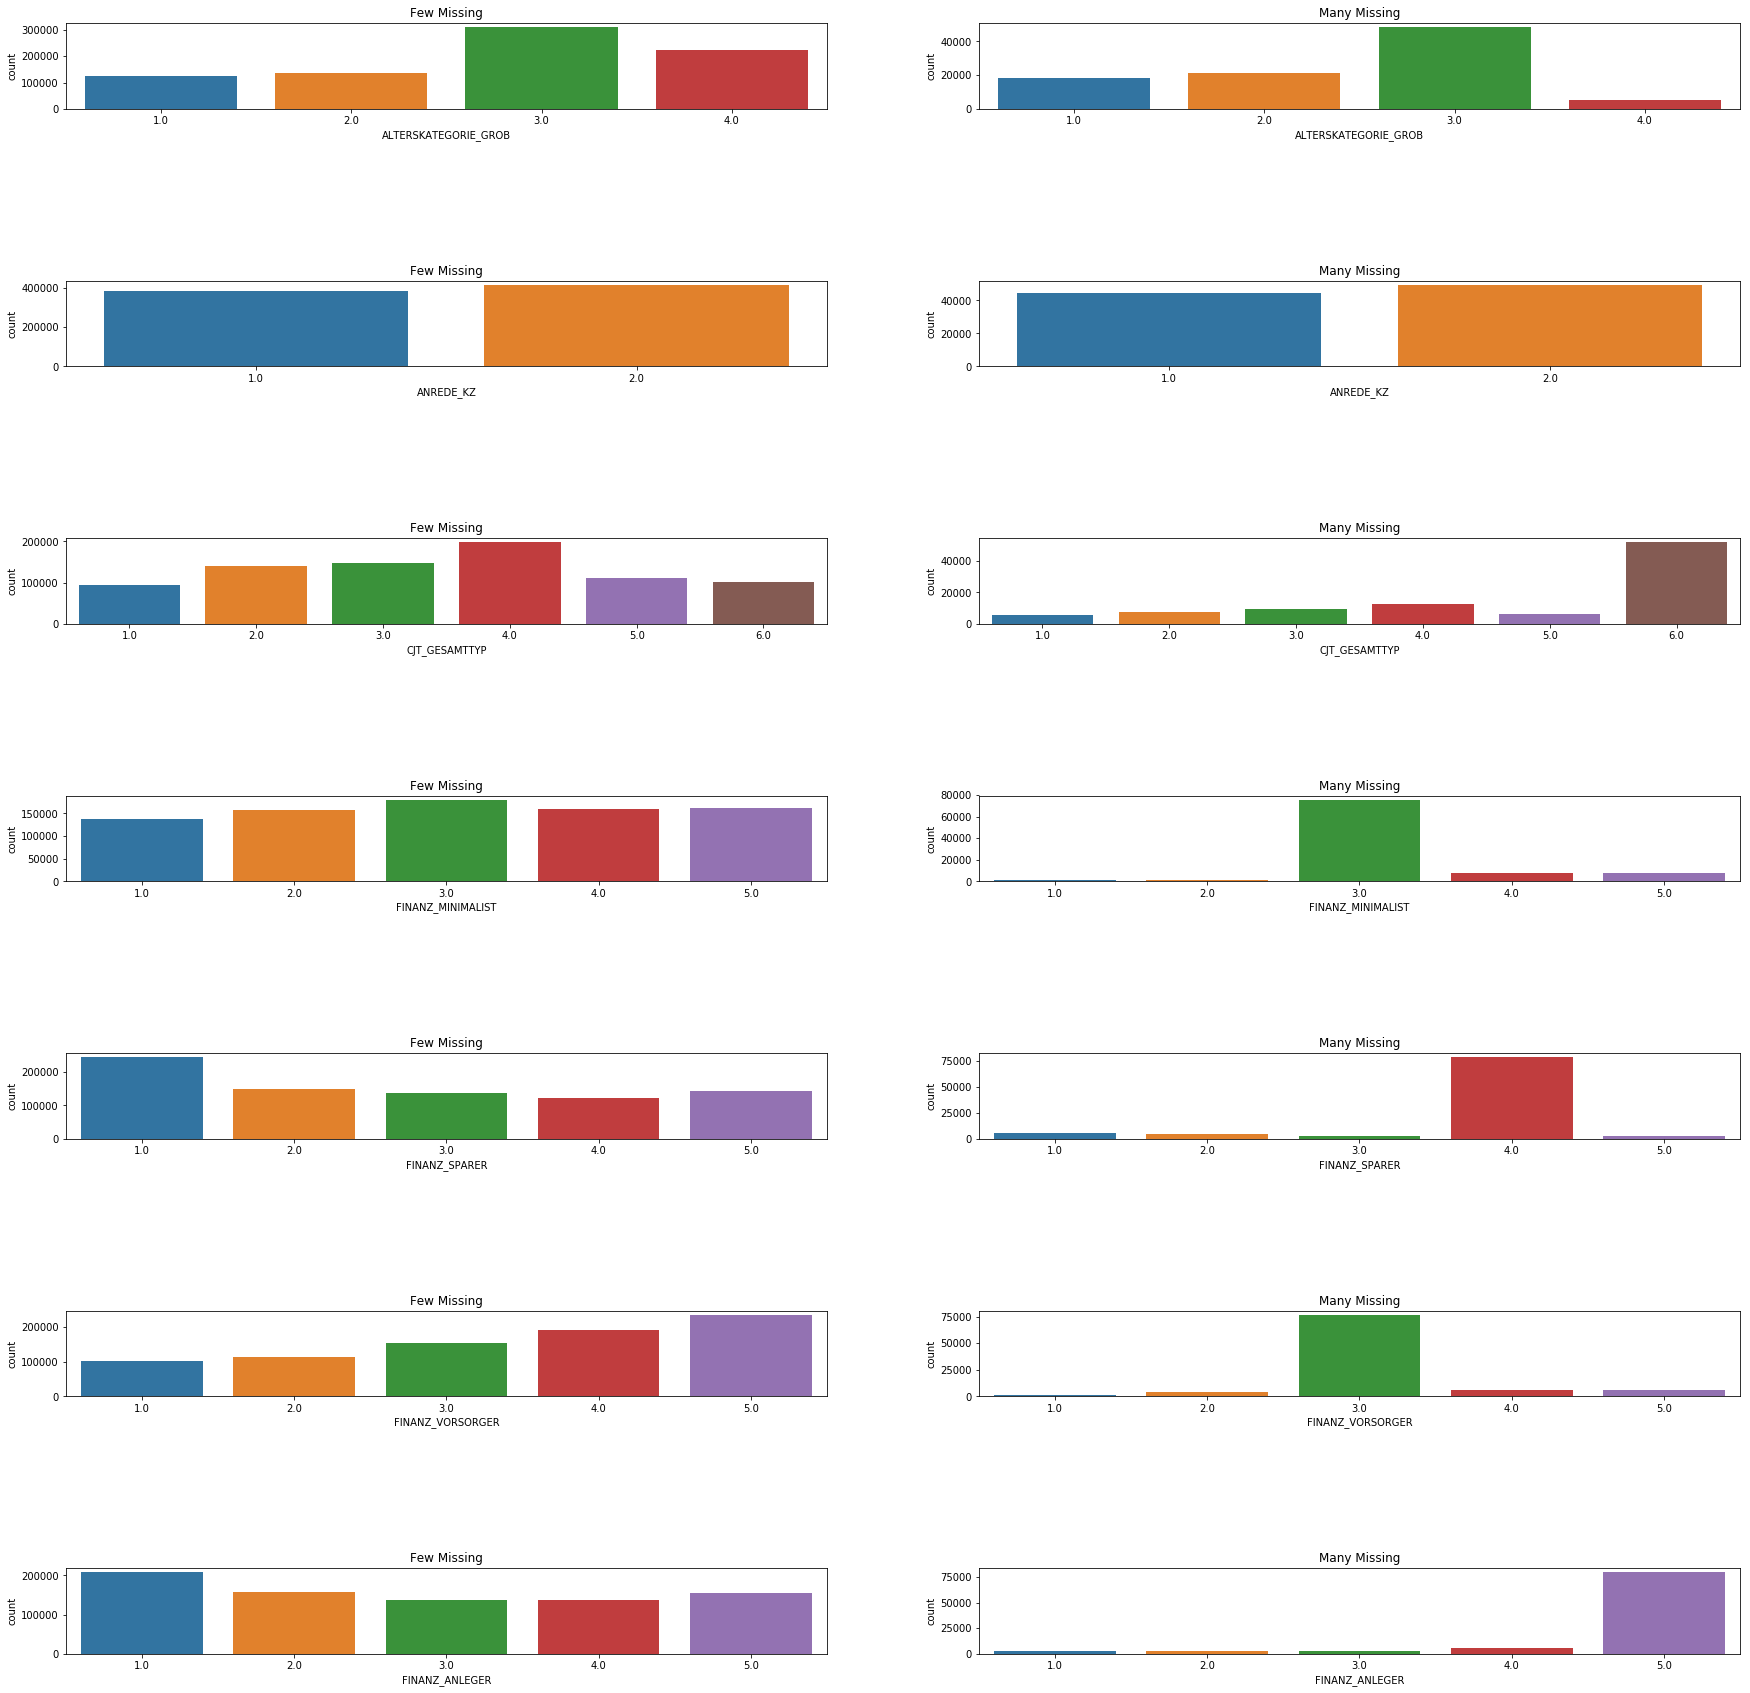

In [22]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.
few_missing_col_name = missing_few_values.columns

def print_countplot(column,count):
    
    fig, axs = plt.subplots(count,2, figsize=(30, 30), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace =2 , wspace=.2)
    axs = axs.ravel()

    for i in range(count):
    
        sns.countplot(missing_few_values[column[i]], ax=axs[i*2])
        axs[i*2].set_title('Few Missing')
        
        sns.countplot(missing_many_values[column[i]], ax=axs[i*2+1])
        axs[i*2+1].set_title('Many Missing')
    
    
print_countplot(few_missing_col_name,7)

In [23]:
# Save data with many missing rows for future analysis 
azdias_many_missing_row = azdias.iloc[missing_many_values.index]

In [24]:
# Print number of rows
print('Number of rows:', azdias.shape[0])

# Drop rows with many missing values
azdias = azdias[~azdias.index.isin(missing_many_values.index)]

# Print number of rows after dropping the rows with many missing values
print('Number of rows after dropping rows with missing values:', azdias.shape[0])

Number of rows: 891221
Number of rows after dropping rows with missing values: 797426


#### Discussion 1.1.3: Assess Missing Data in Each Row

From histograms plots above, we can see that there are differences between datasets in ALTERSKATEGORIE_GROB, CJT_GESAMTTYP, and FINANZ features. We can see almost no difference in ANREDE_KZ. The original number of rows is 891,221. After dropping the rows with many missing values, we have 797,426 rows. So we dropped 93,795 rows. It looks like not very big number compared with the orginal number of rows. We can keep going working with this data after dropping missing rows.

### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [25]:
# How many features are there of each data type?
features = list(missing_few_values.columns)
feat_info_clean = feat_info[feat_info['attribute'].isin(features)]
type_feat_info = feat_info_clean['type'].value_counts()
for i in range(len(type_feat_info)):
    print('{} {} features.'.format(type_feat_info[i], type_feat_info.index[i]))

49 ordinal features.
18 categorical features.
6 numeric features.
6 mixed features.


#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [26]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?
categorical_var = feat_info_clean[feat_info_clean["type"]=="categorical"]["attribute"]

In [27]:
# Check which feature is binary or multi level
binary_feature = []
multi_feature=[]
for feature in categorical_var:
    if (len(missing_few_values[feature].unique())==2):
        binary_feature.append(feature)
    elif (len(missing_few_values[feature].unique())>2):
        multi_feature.append(feature)

In [28]:
# Print names of Binary features   
print('Binary features are: {}'.format(binary_feature))

# Print unique values for each binary feature
for feature in binary_feature:
    print('Unique values for {} are {}'.format(feature, missing_few_values[feature].unique()))

Binary features are: ['ANREDE_KZ', 'GREEN_AVANTGARDE', 'SOHO_KZ', 'OST_WEST_KZ']
Unique values for ANREDE_KZ are [ 2.  1.]
Unique values for GREEN_AVANTGARDE are [0 1]
Unique values for SOHO_KZ are [ 1.  0.]
Unique values for OST_WEST_KZ are ['W' 'O']


In [29]:
# Print names of Multi-level features
print('Multi-level features are: {}'.format(multi_feature))

# Print unique values for each multi level feature
for feature in multi_feature:
    print('Unique values for {} are {}'.format(feature, missing_few_values[feature].unique()))

Multi-level features are: ['CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'VERS_TYP', 'ZABEOTYP', 'GEBAEUDETYP', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015']
Unique values for CJT_GESAMTTYP are [  5.   3.   2.   4.   1.   6.  nan]
Unique values for FINANZTYP are [ 1.  6.  5.  2.  4.  3.]
Unique values for GFK_URLAUBERTYP are [ 10.   1.   5.  12.   9.   3.   8.  11.   4.   2.   7.   6.  nan]
Unique values for LP_FAMILIE_FEIN are [  5.   1.  nan  10.   2.   7.  11.   8.   4.   6.   9.   3.]
Unique values for LP_FAMILIE_GROB are [  3.   1.  nan   5.   2.   4.]
Unique values for LP_STATUS_FEIN are [  2.   3.   9.   4.   1.  10.   5.   8.   6.   7.  nan]
Unique values for LP_STATUS_GROB are [  1.   2.   4.   5.   3.  nan]
Unique values for NATIONALITAET_KZ are [  1.   3.   2.  nan]
Unique values for SHOPPER_TYP are [  3.   2.   1.   0.  nan]
Unique values for VERS_TYP are [  2.   1.  nan]


In [30]:
# Re-encode categorical variable(s) to be kept in the analysis.
new_values = {'W': 0, 'O': 1}
azdias_clean = missing_few_values.replace({'OST_WEST_KZ':new_values})

In [31]:
# To check unique values of OST_WEST_KZ have been converted 
for feature in binary_feature:
    print('Unique values for {} are {}'.format(feature, azdias_clean[feature].unique()))

Unique values for ANREDE_KZ are [ 2.  1.]
Unique values for GREEN_AVANTGARDE are [0 1]
Unique values for SOHO_KZ are [ 1.  0.]
Unique values for OST_WEST_KZ are [0 1]


In [32]:
# Print number of rows and columns for azdias_clean
azdias_clean.shape

(797426, 79)

In [33]:
# Drop Multi-Level features
for feature in multi_feature:
    azdias_clean=azdias_clean.drop(feature, axis=1)

In [34]:
# Print number of rows and columns for azdias_clean
azdias_clean.shape

(797426, 65)

#### Discussion 1.2.1: Re-Encode Categorical Features

I defined what are the binary features and multi-level features. There are 4 binary features and 14 multi-level features. Then, I re-encoded the OST_WEST_KZ values from {'W','O'} to { 0 , 1 }. And I kept all binary features. I removed all the multi-level features. So, we have 65 columns in the dataset. 

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [35]:
# Print the values count of PRAEGENDE_JUGENDJAHRE
azdias_clean['PRAEGENDE_JUGENDJAHRE'].value_counts()

14.0    182903
8.0     141542
10.0     85767
5.0      84665
3.0      53822
15.0     42521
11.0     35735
9.0      33563
6.0      25651
12.0     24440
1.0      20662
4.0      20450
2.0       7479
13.0      5759
7.0       4009
Name: PRAEGENDE_JUGENDJAHRE, dtype: int64

In [36]:
# Create two columns and copy the values of PRAEGENDE_JUGENDJAHRE into them
azdias_clean['DECADE'] = azdias_clean['PRAEGENDE_JUGENDJAHRE']
azdias_clean['MOVEMENT'] = azdias_clean['PRAEGENDE_JUGENDJAHRE']

In [37]:
# Create two dictionaries for decade and movement values
decade = {1:1, 2:1, 3:2, 4:2, 5:3, 6:3, 7:3, 8:4, 9:4, 10:5, 11:5, 12:5, 13:5, 14:6, 15:6}
movement = {1:1, 2:0, 3:1, 4:0, 5:1, 6:0, 7:0, 8:1, 9:0, 10:1, 11:0, 12:1, 13:0, 14:1, 15:0}

In [38]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
azdias_clean['DECADE'].replace(decade, inplace=True)
azdias_clean['MOVEMENT'].replace(movement, inplace=True)

In [39]:
# Print the values count of DECADE
azdias_clean['DECADE'].value_counts()

6.0    225424
4.0    175105
5.0    151701
3.0    114325
2.0     74272
1.0     28141
Name: DECADE, dtype: int64

In [40]:
# Print the values count of MOVEMENT
azdias_clean['MOVEMENT'].value_counts()

1.0    593801
0.0    175167
Name: MOVEMENT, dtype: int64

In [41]:
# Print the values count of CAMEO_INTL_2015
azdias_clean['CAMEO_INTL_2015'].value_counts()

51    133673
41     92309
24     91099
14     62851
43     56653
54     45376
25     39605
22     33137
23     26667
13     26311
45     26126
55     23939
52     20538
31     18979
34     18517
15     16966
44     14817
12     13234
35     10352
32     10346
33      9928
Name: CAMEO_INTL_2015, dtype: int64

In [42]:
# Create two columns and copy the values of CAMEO_INTL_2015 into them
azdias_clean['WEALTH'] = azdias_clean['CAMEO_INTL_2015']
azdias_clean['LIFE_STAGE'] = azdias_clean['CAMEO_INTL_2015']

In [43]:
# Create two dictionaries for decade and movement values
wealth = {'11':1, '12':1, '13':1, '14':1, '15':1, '21':2, '22':2, '23':2, '24':2, '25':2,
               '31':3, '32':3, '33':3, '34':3, '35':3, '41':4, '42':4, '43':4, '44':4, '45':4,
               '51':5, '52':5, '53':5, '54':5, '55':5}

lifestage = {'11':1, '12':2, '13':3, '14':4, '15':5, '21':1, '22':2, '23':3, '24':4, '25':5,
                   '31':1, '32':2, '33':3, '34':4, '35':5, '41':1, '42':2, '43':3, '44':4, '45':5,
                   '51':1, '52':2, '53':3, '54':4, '55':5}

In [44]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.
azdias_clean['WEALTH'].replace(wealth, inplace=True)
azdias_clean['LIFE_STAGE'].replace(lifestage, inplace=True)

In [45]:
# Print the values count of WEALTH
azdias_clean['WEALTH'].value_counts()

5.0    223526
2.0    190508
4.0    189905
1.0    119362
3.0     68122
Name: WEALTH, dtype: int64

In [46]:
# Print the values count of
azdias_clean['LIFE_STAGE'].value_counts()

1.0    244961
4.0    232660
3.0    119559
5.0    116988
2.0     77255
Name: LIFE_STAGE, dtype: int64

#### Discussion 1.2.2: Engineer Mixed-Type Features

I created two columns for each feature (PRAEGENDE_JUGENDJAHRE and CAMEO_INTL_2015) and copied values into them. Then, I created two dictionaries for each of them. I initialed feature values to dictionaries. I replaced the values with dictionaries' values.

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [47]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)

# Print the value count of type
feat_info_clean["type"].value_counts()

ordinal        49
categorical    18
numeric         6
mixed           6
Name: type, dtype: int64

In [48]:
azdias_clean.shape

(797426, 69)

In [49]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.

# Remove mixed features 
mixed_features = feat_info_clean[feat_info_clean["type"]=="mixed"]["attribute"]
for feature in mixed_features:
    azdias_clean.drop(feature, axis=1, inplace=True)

In [50]:
azdias_clean.shape

(797426, 63)

### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [51]:
def clean_data(df):
    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...
    for attrib, missing_values in zip(feat_info['attribute'],feat_info['missing_or_unknown']):
        if missing_values[0] != '':
            for value in missing_values:
            
                if value.isnumeric() or value.lstrip('-').isnumeric(): # to prevent converting XX or X
                    value = int(value) 
                # convert
                df.loc[df[attrib]==value,attrib]=np.nan
    # remove selected columns and rows, ...
    # drop columns with more than 20% missing values
    clean_missing_values_per_column = ['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP', 'KBA05_BAUMAX']
    df = df.drop(clean_missing_values_per_column, axis=1)
    # drop rows with equal or less than 20 missing values
    df = df[df.isnull().sum(axis=1) <= 20]
    # select, re-encode, and engineer column values.

    # re-encode binary feature
    new_values = {'W': 0, 'O': 1}
    df = df.replace({'OST_WEST_KZ':new_values})
    
    # drop multi-leve features
    categorical_var = feat_info_clean[feat_info_clean["type"]=="categorical"]["attribute"]
    multi_feature=[]
    for feature in categorical_var:
        if (len(missing_few_values[feature].unique())>2):
            multi_feature.append(feature)
    for feature in multi_feature:
        df=df.drop(feature, axis=1)
    
    # engineer mixed features
    df['DECADE'] = df['PRAEGENDE_JUGENDJAHRE']
    df['MOVEMENT'] = df['PRAEGENDE_JUGENDJAHRE']
    
    decade = {1:1, 2:1, 3:2, 4:2, 5:3, 6:3, 7:3, 8:4, 9:4, 10:5, 11:5, 12:5, 13:5, 14:6, 15:6}
    movement = {1:1, 2:0, 3:1, 4:0, 5:1, 6:0, 7:0, 8:1, 9:0, 10:1, 11:0, 12:1, 13:0, 14:1, 15:0}
    
    df['DECADE'].replace(decade, inplace=True)
    df['MOVEMENT'].replace(movement, inplace=True)
    
    df['WEALTH'] = df['CAMEO_INTL_2015']
    df['LIFE_STAGE'] = df['CAMEO_INTL_2015']
    
    wealth = {'11':1, '12':1, '13':1, '14':1, '15':1, '21':2, '22':2, '23':2, '24':2, '25':2,
                   '31':3, '32':3, '33':3, '34':3, '35':3, '41':4, '42':4, '43':4, '44':4, '45':4,
                   '51':5, '52':5, '53':5, '54':5, '55':5}
    
    lifestage = {'11':1, '12':2, '13':3, '14':4, '15':5, '21':1, '22':2, '23':3, '24':4, '25':5,
                       '31':1, '32':2, '33':3, '34':4, '35':5, '41':1, '42':2, '43':3, '44':4, '45':5,
                       '51':1, '52':2, '53':3, '54':4, '55':5}
    
    df['WEALTH'].replace(wealth, inplace=True)
    df['LIFE_STAGE'].replace(lifestage, inplace=True)
    
    mixed_features = feat_info_clean[feat_info_clean["type"]=="mixed"]["attribute"]
    for feature in mixed_features:
        df.drop(feature, axis=1, inplace=True)
    # Return the cleaned dataframe.
    return df

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [52]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.

# Fill missing value by using most_frequent strategy
fill_missing_value = Imputer(strategy='most_frequent')
azdias_clean_imp = pd.DataFrame(fill_missing_value.fit_transform(azdias_clean))

In [53]:
azdias_clean_imp.columns = azdias_clean.columns
azdias_clean_imp.index = azdias_clean.index

In [54]:
# Apply feature scaling to the general population demographics data.
scale = StandardScaler() 
azdias_clean_scaled = scale.fit_transform(azdias_clean_imp)

In [55]:
azdias_clean_scaled = pd.DataFrame(azdias_clean_scaled, columns=list(azdias_clean_imp))

In [56]:
# Print first 5 rows from azdias_clean_scaled 
azdias_clean_scaled.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,DECADE,MOVEMENT,WEALTH,LIFE_STAGE
0,-1.766334,0.958071,-1.494609,1.538200,-1.040726,1.466448,0.959677,1.338816,-0.530567,1.010368,...,0.441766,1.455006,0.573846,-0.171603,-0.127145,0.684744,1.098531,0.530567,1.175734,-1.249157
1,0.200589,0.958071,-1.494609,0.864824,-1.766955,-0.570799,0.244962,1.338816,1.884775,1.010368,...,-0.935489,0.419154,0.573846,-0.171603,-0.127145,-0.789154,1.098531,-1.884775,-0.869674,0.766845
2,1.184051,0.958071,0.683150,-0.481928,1.137960,-0.570799,-1.184467,-0.792034,-0.530567,-0.311674,...,-0.935489,-0.616697,0.573846,-1.173369,-0.997689,-0.052205,-0.267356,0.530567,-1.551476,-0.577156
3,0.200589,-1.043765,0.683150,0.191448,0.411731,-1.249881,0.244962,-0.792034,-0.530567,1.010368,...,0.441766,-0.616697,-0.337337,0.830164,0.308127,1.421694,-0.267356,0.530567,0.493932,0.094845
4,-1.766334,0.958071,-0.042770,-1.155304,1.137960,-0.570799,-0.469752,1.338816,-0.530567,1.010368,...,0.441766,1.455006,1.485029,-1.173369,-0.997689,-0.052205,-1.633243,0.530567,1.175734,0.766845


### Discussion 2.1: Apply Feature Scaling

I applied Imputer to replace all missing values and using strategy 'most_frequent'. Then, I scaled the dataset by using StandardScaler().

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [57]:
# Apply PCA to the data.
pca = PCA()
pca.fit(azdias_clean_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Text(0,0.5,'Variance Explained (%)')

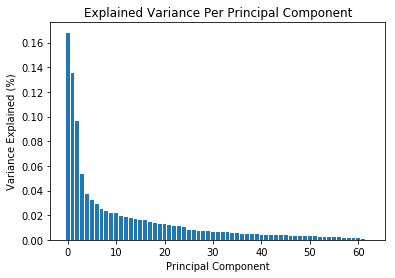

In [58]:
# Investigate the variance accounted for by each principal component.
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.title("Explained Variance Per Principal Component")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained (%)")

Text(0,0.5,'VariancE')

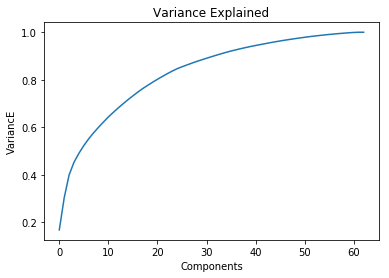

In [59]:
# Investigate the variance accounted for by each principal component.
plt.plot(range(len(pca.explained_variance_ratio_)),np.cumsum(pca.explained_variance_ratio_), '-')
plt.title("Variance Explained")
plt.xlabel("Components")
plt.ylabel("VariancE")

In [60]:
# Re-apply PCA to the data while selecting for number of components to retain.
pca_20 = PCA(n_components=20)
azdias_20pca = pca_20.fit_transform(azdias_clean_scaled)

### Discussion 2.2: Perform Dimensionality Reduction

I applied PCA to the dataset. Then, I created the histograms plots to show the variance. I reapplied PCA with 20 of components.  We can see from the plot above the 20 expalains 80% variances while reducing the number of features by more than 50%.

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [61]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.
def pca_weights(pca, i):
    df = pd.DataFrame(pca.components_, columns=list(azdias_clean_scaled.columns))
    weights = df.iloc[i].sort_values(ascending=False)
    return weights

In [62]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
pca_weight_0 = pca_weights(pca_20, 0)
print (pca_weight_0)

PLZ8_ANTG3               0.225113
PLZ8_ANTG4               0.216707
WEALTH                   0.204511
HH_EINKOMMEN_SCORE       0.202140
ORTSGR_KLS9              0.196389
EWDICHTE                 0.194206
FINANZ_HAUSBAUER         0.159226
FINANZ_SPARER            0.153800
KBA05_ANTG4              0.153789
PLZ8_ANTG2               0.153456
ARBEIT                   0.142393
KBA05_ANTG3              0.136674
ANZ_HAUSHALTE_AKTIV      0.135870
RELAT_AB                 0.134715
SEMIO_PFLICHT            0.121968
SEMIO_REL                0.119497
DECADE                   0.112947
MOVEMENT                 0.110250
SEMIO_RAT                0.100503
SEMIO_TRADV              0.094804
SEMIO_MAT                0.083795
FINANZ_UNAUFFAELLIGER    0.081817
SEMIO_FAM                0.081650
SEMIO_KULT               0.076372
FINANZ_ANLEGER           0.075766
REGIOTYP                 0.060357
OST_WEST_KZ              0.053795
SEMIO_SOZ                0.043543
PLZ8_HHZ                 0.042129
HEALTH_TYP    

In [63]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.
pca_weight_1 = pca_weights(pca_20, 1)
print (pca_weight_1)

ALTERSKATEGORIE_GROB     0.256059
SEMIO_ERL                0.229831
FINANZ_VORSORGER         0.228709
SEMIO_LUST               0.179836
RETOURTYP_BK_S           0.161748
FINANZ_HAUSBAUER         0.122589
SEMIO_KRIT               0.117781
SEMIO_KAEM               0.116840
W_KEIT_KIND_HH           0.114899
PLZ8_ANTG3               0.099529
EWDICHTE                 0.098558
ORTSGR_KLS9              0.097340
PLZ8_ANTG4               0.097230
ANREDE_KZ                0.093649
WEALTH                   0.080226
KBA05_ANTG4              0.075926
SEMIO_DOM                0.074545
ARBEIT                   0.072484
RELAT_AB                 0.069845
PLZ8_ANTG2               0.068854
ANZ_HAUSHALTE_AKTIV      0.067085
HH_EINKOMMEN_SCORE       0.062834
FINANZ_MINIMALIST        0.058392
WOHNDAUER_2008           0.058138
KBA05_ANTG3              0.051234
ANZ_HH_TITEL             0.032219
OST_WEST_KZ              0.027990
MOVEMENT                 0.018985
PLZ8_HHZ                 0.015944
REGIOTYP      

In [64]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.
pca_weight_2 = pca_weights(pca_20, 2)
print (pca_weight_2)

SEMIO_VERT               0.344671
SEMIO_SOZ                0.261865
SEMIO_FAM                0.248854
SEMIO_KULT               0.233800
FINANZ_MINIMALIST        0.154520
RETOURTYP_BK_S           0.109157
FINANZ_VORSORGER         0.101783
W_KEIT_KIND_HH           0.085207
ALTERSKATEGORIE_GROB     0.079814
SEMIO_REL                0.067751
SEMIO_LUST               0.064629
SEMIO_MAT                0.055680
ORTSGR_KLS9              0.050286
EWDICHTE                 0.049491
PLZ8_ANTG4               0.049148
PLZ8_ANTG3               0.048480
GREEN_AVANTGARDE         0.047077
ARBEIT                   0.037333
RELAT_AB                 0.034344
PLZ8_ANTG2               0.032706
WOHNDAUER_2008           0.032599
WEALTH                   0.030201
KBA05_ANTG4              0.029981
ANZ_HAUSHALTE_AKTIV      0.026809
OST_WEST_KZ              0.016314
ANZ_HH_TITEL             0.013931
KBA05_ANTG3              0.011848
ANZ_TITEL                0.009710
PLZ8_HHZ                 0.005566
SOHO_KZ       

### Discussion 2.3: Interpret Principal Components

From the first principal component, we can see that there are the positive correlation with <br>
* PLZ8_ANTG3: lower share of 6-10 family homes.<br>
* PLZ8_ANTG4: lower share of 10+ family homes.<br>
There are a negative correlation with<br>
* PLZ8_ANTG1: lower share of 1-2 family homes.<br>
* MOBI_REGIO: high movement.<br>
We acn say that the share of 10+ family homes and the share of 6-10 family homes for macro-cells tend to increase together.<br><br>


From the second principal component, we can see that there are the positive correlation with <br>
* ALTERSKATEGORIE_GROB: Estimated age based on given name analysis.<br>
* SEMIO_ERL: very high affinity.<br>
There are a negative correlation with DECADE and FINANZ_SPARER<br><br> 


From the third principal component, we can see that there are the positive correlation with SEMIO_VERT and SEMIO_SOZ.<br>There are a negative correlation with ANREDE_KZ and SEMIO_KAEM.<br>

## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [65]:
# Create kmean function
def k_mean_score(data, n_cluster):
    kmeans = KMeans(n_clusters = n_cluster)
    model = kmeans.fit(data)
    result = np.abs(model.score(data))
    return result

In [66]:
# Over a number of different cluster counts...
# run k-means clustering on the data and...
# compute the average within-cluster distances.
results = []
kmr = list(range(1,5))
for k in kmr:
    results.append(k_mean_score(azdias_20pca, k))    

Text(0.5,1,'SSE vs. K')

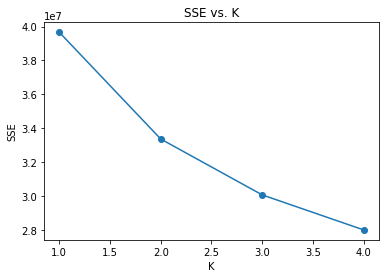

In [67]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.
plt.plot(kmr, results, linestyle='-', marker='o')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('SSE vs. K')

In [68]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
kmeans = KMeans(n_clusters = 4)
model_4 = kmeans.fit(azdias_20pca)
azdias_pred = model_4.predict(azdias_20pca)

#### Discussion 3.1: Apply Clustering to General Population

As we see in the plot above, there is a high decreasing until 4. So I selected number 4 of cluster. 

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [69]:
# Load in the customer demographics data.
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', sep=';')

In [70]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.
customers_clean = clean_data(customers)

In [71]:
# Replace NaN
customers_clean_imp = pd.DataFrame(fill_missing_value.transform(customers_clean))
customers_clean_imp.columns = customers_clean.columns
customers_clean_imp.index = customers_clean.index

In [72]:
# Apply scaler
customers_clean_scaled = scale.transform(customers_clean_imp)
customers_clean_scaled = pd.DataFrame(customers_clean_scaled, columns=list(customers_clean_imp))
# PCA transformation
customers_pca = pca_20.transform(customers_clean_scaled)

In [73]:
# Predict using Kmeans model_4
customers_pred = model_4.predict(customers_pca)

### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

Text(0,0.5,'proportion of persons in each cluster')

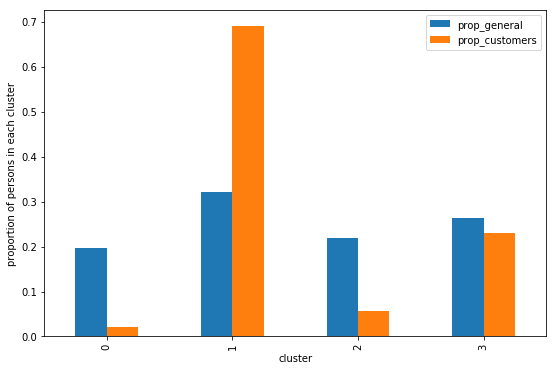

In [74]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.
general_prop = []
customers_prop = []
x = [i+0 for i in range(4)]
for i in range(4):
    general_prop.append((azdias_pred == i).sum()/len(azdias_pred))
    customers_prop.append((customers_pred == i).sum()/len(customers_pred))


df_general = pd.DataFrame({'cluster' : x, 'prop_general' : general_prop, 'prop_customers':customers_prop})
df_general.plot(x='cluster', y = ['prop_general', 'prop_customers'], kind='bar', figsize=(9,6))
plt.ylabel('proportion of persons in each cluster')

In [75]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?
cluster_1 = scale.inverse_transform(pca_20.inverse_transform(model_4.cluster_centers_[1]))

In [76]:
overrepresented_c = pd.Series(data = cluster_1, index = customers_clean.columns)

In [77]:
overrepresented_c

ALTERSKATEGORIE_GROB        3.425150
ANREDE_KZ                   1.502628
FINANZ_MINIMALIST           4.297189
FINANZ_SPARER               1.612544
FINANZ_VORSORGER            4.275027
FINANZ_ANLEGER              2.147691
FINANZ_UNAUFFAELLIGER       1.955431
FINANZ_HAUSBAUER            2.392559
GREEN_AVANTGARDE            0.403403
HEALTH_TYP                  2.158130
RETOURTYP_BK_S              3.763273
SEMIO_SOZ                   3.846034
SEMIO_FAM                   3.393085
SEMIO_REL                   2.872658
SEMIO_MAT                   3.007895
SEMIO_VERT                  4.561519
SEMIO_LUST                  5.128277
SEMIO_ERL                   5.352739
SEMIO_KULT                  3.423862
SEMIO_RAT                   3.034303
SEMIO_KRIT                  4.600203
SEMIO_DOM                   4.448192
SEMIO_KAEM                  4.106880
SEMIO_PFLICHT               3.090424
SEMIO_TRADV                 2.810625
SOHO_KZ                     0.008788
ANZ_PERSONEN                1.996835
A

In [78]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?
cluster_3 = scale.inverse_transform(pca_20.inverse_transform(model_4.cluster_centers_[3]))

In [79]:
underrepresented_c = pd.Series(data = cluster_3, index = customers_clean.columns)

In [80]:
underrepresented_c

ALTERSKATEGORIE_GROB        3.467442
ANREDE_KZ                   1.554420
FINANZ_MINIMALIST           2.911359
FINANZ_SPARER               1.910506
FINANZ_VORSORGER            4.273696
FINANZ_ANLEGER              1.938780
FINANZ_UNAUFFAELLIGER       1.737289
FINANZ_HAUSBAUER            3.987187
GREEN_AVANTGARDE            0.076865
HEALTH_TYP                  2.187954
RETOURTYP_BK_S              4.279778
SEMIO_SOZ                   3.937398
SEMIO_FAM                   3.559864
SEMIO_REL                   2.888287
SEMIO_MAT                   3.245048
SEMIO_VERT                  4.121693
SEMIO_LUST                  5.236881
SEMIO_ERL                   5.518520
SEMIO_KULT                  3.297425
SEMIO_RAT                   3.049658
SEMIO_KRIT                  4.928152
SEMIO_DOM                   4.703155
SEMIO_KAEM                  4.681565
SEMIO_PFLICHT               3.122222
SEMIO_TRADV                 2.604582
SOHO_KZ                     0.007465
ANZ_PERSONEN                1.399428
A

### Discussion 3.3: Compare Customer Data to Demographics Data

As we see from the bar plot above, the cluster 2 is overrepresented in the customers data compared to general population data. 
Cluster 4 is overrepresented in the customers data compared to general population data.<br>
The description of some of the segments of the population that are relatively popular with the mail-order company:<br>
* WEALTH = 2.33: Comfortable households.<br>
* PLZ8_ANTG3 = 0.95: areas where the share of 6-10 family homes is lower.<br>
* LIFE_STAGE = 3.45:Pre-Family Couples & Singles or Young Couples With Children<br>


The cluster 0 is underrepresented in the customers data.compared to general population data.<br>
The description of some of the segments of the population that are relatively unpopular with the company:<br>
* WEALTH = 4.22: Less Affluent or Poorer households.<br>
* PLZ8_ANTG3 = 2.27: areas where the share of 6-10 family homes is higher.<br>
* LIFE_STAGE = 2.49: Families With School Age Children or Older Families & Mature Couples.<br>